# Visualization

### 1. Importing Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
# importing files
path = r'C:\Users\nicol\Instacart Basket Analysis'

In [3]:
df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_left.pkl'))

In [4]:
df_ords_customers.shape

(32434212, 34)

In [5]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   user_id                 int64         
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_last_order   float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float32       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  

### 2. Analysis and Charts

In [6]:
# count rows for each day of the week
df_ords_customers['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

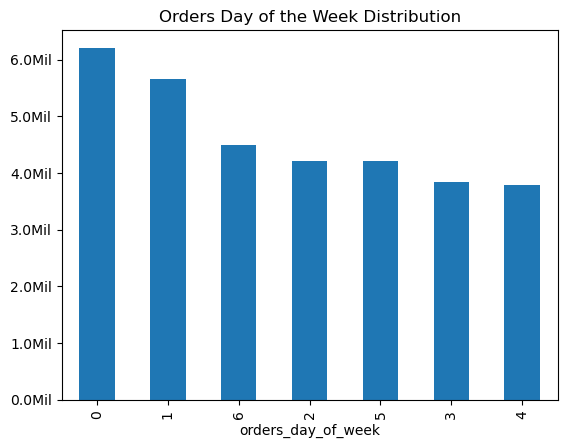

In [7]:
# plot a bar chart on orders_days_of_week value counts to see the distribution. Sorted by largest to smallest
plt.title('Orders Day of the Week Distribution')
ax=df_ords_customers['orders_day_of_week'].value_counts().plot.bar()

#formats y-axis as Mil (millions)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'Mil'))

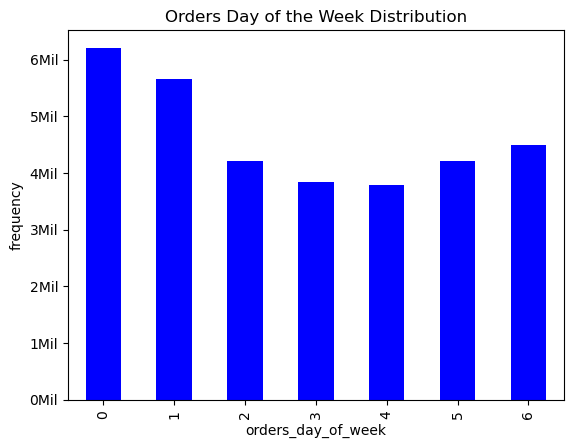

In [8]:
# bar chart of orders_days_of_week distribution sorted by orders_day_of_week

#formats y-axis as M (millions)
plt.title('Orders Day of the Week Distribution')
bar_odow = df_ords_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['blue'], x='orders day of the week', ylabel='frequency')
bar_odow.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [9]:
# export bar graph
bar_odow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 2.1 Histogram Chart

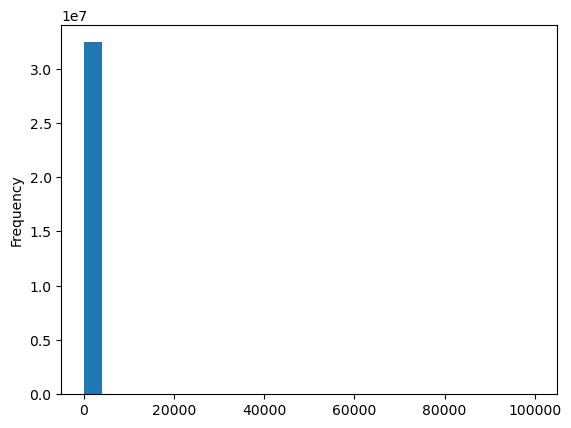

In [10]:
# historgram of prices using 25 bins
bar_hprices = df_ords_customers['prices'].plot.hist(bins=25 )

In [11]:
# consistency check
df_ords_customers['prices'].describe()

count    3.243421e+07
mean     1.198115e+01
std      4.954118e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
df_ords_customers['prices'].max()

99999.0

In [13]:
df_ords_customers['prices'].median()

7.400000095367432

In [14]:
df_ords_customers['prices'].mean()

11.981154

In [15]:
df_ords_customers.loc[df_ords_customers['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
7816,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,14900.0,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864
7817,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,14900.0,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864
15172,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,14900.0,Nicole,Odonnell,Female,Hawaii,55,2018-11-11,2,married,230074
20294,965345,3531,prior,27,2,19,8.0,33664,2,0,...,99999.0,Alice,Compton,Female,Hawaii,80,2019-10-06,2,married,233776
20528,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,14900.0,Jerry,Allen,Male,Louisiana,59,2019-08-23,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,99999.0,nan,Gould,Male,Rhode Island,58,2019-01-25,1,married,207497
32337105,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,99999.0,Diana,Hansen,Female,Rhode Island,35,2018-08-04,0,single,86490
32340034,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,99999.0,Johnny,Colon,Male,Rhode Island,78,2019-05-08,2,married,195077
32359285,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,99999.0,Catherine,Browning,Female,South Carolina,48,2017-01-18,2,married,398880


In [16]:
df_ords_customers.loc[df_ords_customers['prices'] >100, 'prices'] = np.nan

In [17]:
df_ords_customers['prices'].max()

25.0

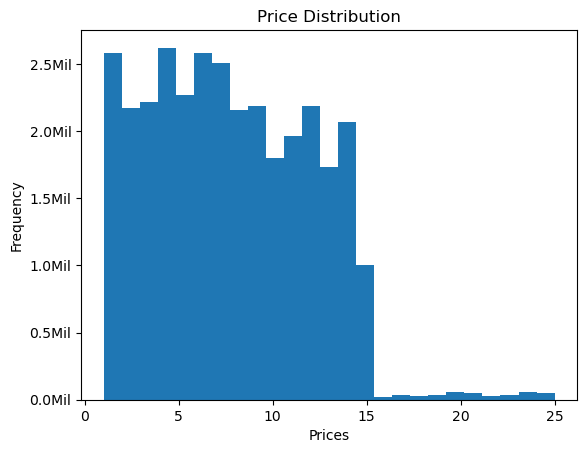

In [18]:
# historgram of prices using 25 bins
plt.title('Price Distribution')
bar_hprices = df_ords_customers['prices'].plot.hist(bins=25, xlabel = 'Prices' )
bar_hprices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.1f')+'Mil'))

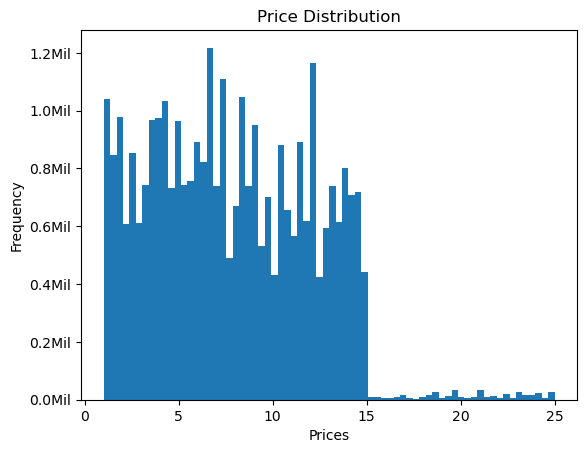

In [19]:
# historgram of prices using 70 bins
bar_hprices2 = df_ords_customers['prices'].plot.hist(bins=70, xlabel='Prices')
plt.title('Price Distribution')
bar_hprices2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.1f')+'Mil'))

In [20]:
# export histogram
bar_hprices2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hprices.png'))

### 2.2 Scatterplot Chart

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


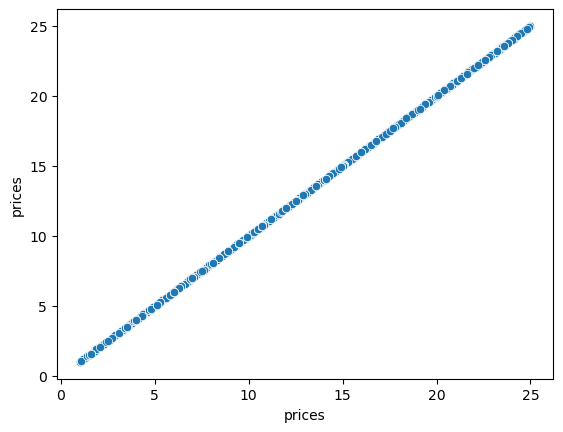

In [21]:
# creating scatterplot
scatterplot_prices=sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_customers)

In [22]:
# export scatterplot
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

### 2.3 Sampling Data to Create Line Chart

In [23]:
# creating random samples
np.random.seed(4)
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [24]:
dev

array([False,  True, False, ..., False,  True,  True])

In [25]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [26]:
# generating random numbers
np.random.seed(10)
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [27]:
np.random.rand(8)

array([0.81573195, 0.58661313, 0.97624491, 0.04815114, 0.61855946,
       0.79943492, 0.87183781, 0.95338726])

In [28]:
# store 70% of sample of dataframe in big
big = df_ords_customers[dev]

In [29]:
# store 30% of sample of dataframe in small
small = df_ords_customers[~dev]

In [30]:
# checking rows in big & small
len(df_ords_customers)

32434212

In [31]:
len(big) + len(small)

32434212

In [32]:
# reducing columns necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

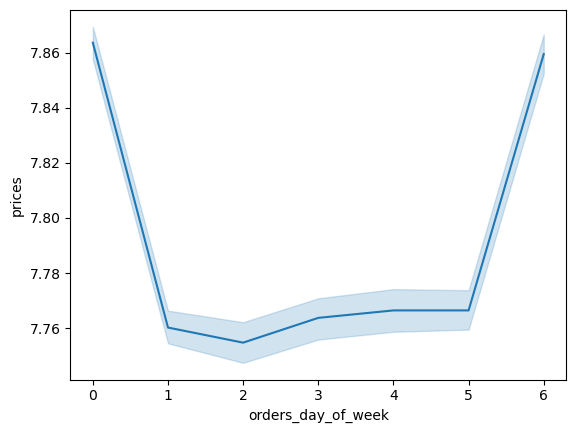

In [33]:
# creating chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [34]:
df_4 = df_ords_customers[['orders_day_of_week','prices']]

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

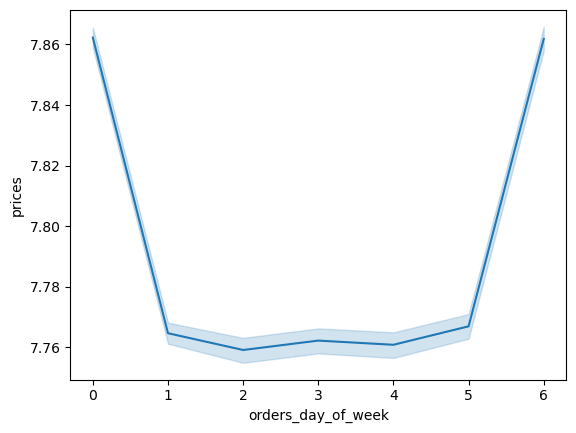

In [35]:
# creating chart
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

In [38]:
# export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

### 2.3 'order_hour_of_day' Analysis

In [39]:
df_ords_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,9.0,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [40]:
df_ohod = df_ords_customers[['order_hour_of_day']]

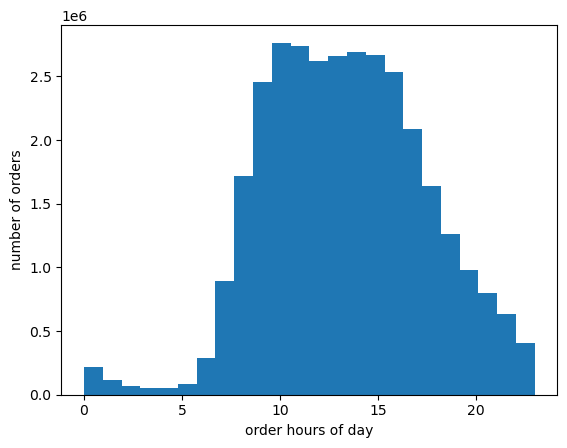

In [42]:
# create histogram
hist_ohod = df_ohod['order_hour_of_day'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')

In [46]:
# export histogram
hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_hrs_distribution.png'))

In [47]:
df_ohod['order_hour_of_day'].value_counts()

order_hour_of_day
10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: count, dtype: int64

#### Observations:
1. Peak hours for order is between 10am - 3pm.
2. Most orders are made at 10am and 2pm.
3. Off peak hours (minimum orders) are between 12am to 5am.

### 2.4 'loyalty_flag' Analysis

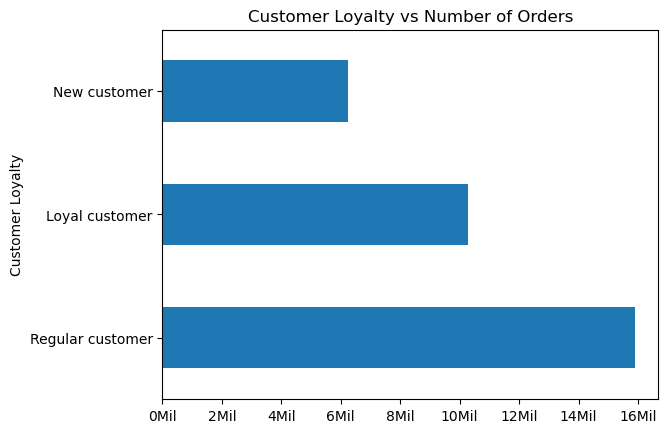

In [52]:
# horizontal bar graph loyalty flag vs count of orders per loyalty flag
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")
plt.title("Customer Loyalty vs Number of Orders")
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'Mil'))

In [53]:
# export graph
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag_distribution.png'))

In [54]:
# checking the order count of loyalty flags
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: count, dtype: int64

In [55]:
# calculating percentages of each customer loytalty type
print("Regular Customer: " + str((15891077 / (15891077+10293737+6249398)*100)) + "%")
print("Loyal Customer: " + str((10293737 / (15891077+10293737+6249398)*100)) + "%")
print("New Customer: " + str((6249398 / (15891077+10293737+6249398)*100)) + "%")

Regular Customer: 48.99479907204159%
Loyal Customer: 31.73728099205863%
New Customer: 19.267919935899783%


#### Observations:
1. Regular customers made the most orders at 49%.
2. Loyalty customers made 32% of the orders.
2. New customers made the least amount of orders at 19%.

### 2.5 'Order Hours of Day vs Prices' Analysis

In [65]:
# extracting columns and checking the dataframe
df_small_ohod_prices = small[['order_hour_of_day', 'prices']]

In [63]:
df_small_ohod_prices.head()

,order_hour_of_day,prices
0,8,9.0
3,7,9.0
7,14,9.0
11,8,4.4
14,7,4.4


C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

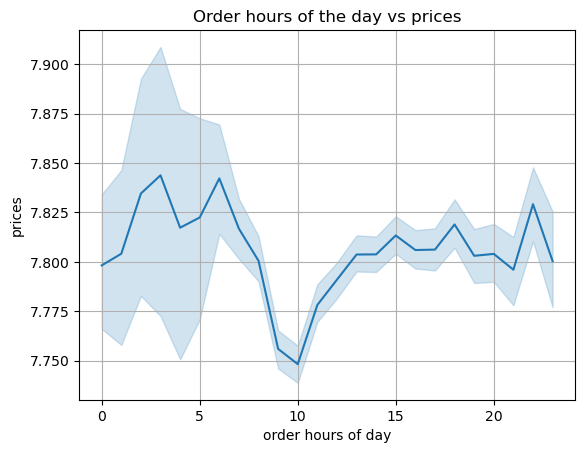

In [58]:
# Create a line graph to check correlation between order hours and prices
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='order_hour_of_day', y='prices')
line_ohod_prices.set(xlabel='order hours of day')
plt.title('Order hours of the day vs Prices')
plt.grid()

In [59]:
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hours_vs_prices.png'))

#### Observations: 
1. Expenses are highest at 3am and 6am.
2. Overall expenses are higher between 10pm and 6am, with peaks at 10pm, 2am, 3am, and 6am.

### 2.6 'Age vs Dependents' Analysis

In [67]:
# extract age and dependents
df_age_dependents = df_ords_customers[['age','n_dependants']]

In [69]:
df_age_dependents.head()

,age,n_dependants
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

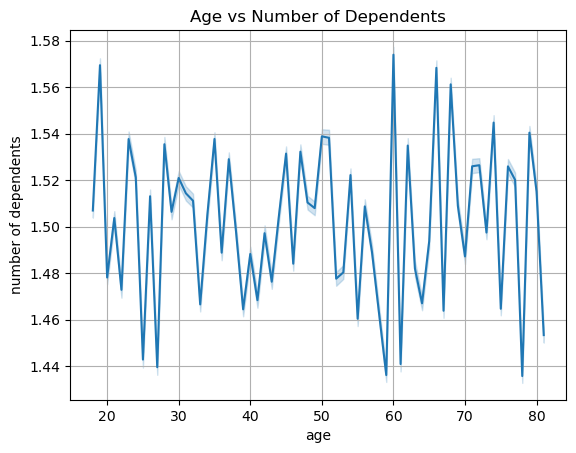

In [71]:
# create a line graph using seaborn to check for correlation between Age vs No. of Dependents
line_age_ndependents = sns.lineplot(data=df_age_dependents, x='age', y='n_dependants')
line_age_ndependents.set(xlabel='age', ylabel='number of dependents')
plt.title('Age vs Number of Dependents')
plt.grid()

In [73]:
# export line plot
line_age_ndependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_ndependents.png'))

#### Observation: 
there are no correlation between age and number of dependents.

#### Number of customers by family status using bar graph

In [74]:
# extract fam_status and user_id into separate dataframe
df_fam_status_dependents = df_ords_customers[['fam_status','user_id']]
df_fam_status_dependents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     int64 
dtypes: int64(1), object(1)
memory usage: 494.9+ MB


In [76]:
# Count unique users per fam_status
fam_users_no = df_fam_status_dependents.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})

In [77]:
fam_users_no

,fam_status,user_id
0,divorced/widowed,17640
1,living with parents and siblings,9701
2,married,144906
3,single,33962


C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'User Distribution by Family Status')

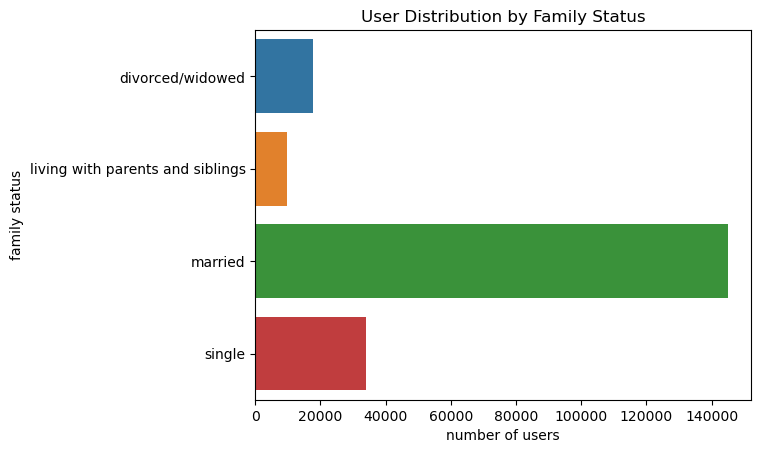

In [78]:
# Create a bar graph to show the user distribution based on family status
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=fam_users_no)
bar_fam_users.set(ylabel='family status', xlabel='number of users')
plt.title('User Distribution by Family Status')

In [79]:
bar_fam_users.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_users.png'))

#### Observation:
Majority of users are married, then single.

### 2.7 'Age vs Income' Analysis

In [80]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

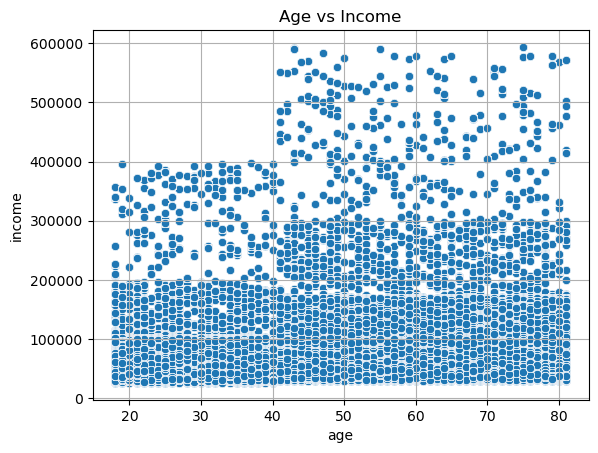

In [81]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income')
scatter_age_income.set(xlabel='age', ylabel='income')

In [82]:
# export scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

#### Observations:

1. Ages between 18 to 40 have lower income compared to above 40
2. Customers between 18 and 40 have income less than 400,000. Larger subset of customers have less than 200,000
3. Customers above 40 surpass 400,000 and earn upto 600,000